In [2]:
def generate_poisson(pi, mu, sigma, end=50):
    """
    Input:
    pi = array of weights of length c
    mu = array of means of length c
    sigma = array of variances of lenght c
    Taken as input the parameters of a Gaussian Mixtures returns the
    density of a Poisson distribution having as rate given mixture, truncated to [0, end]
    """
    c = len(pi)   # number of components in the mixture
    
    # initializes the density vector, storing a density for each components
    pois_dens = np.zeros((c,end))
    # initializes the vector of factorials
    log_fact = np.array([sum([np.log(i) for i in range(1,n)]) for n in range(1,end+1)])
    
    # computes the Gaussian density for each component
    muprime = mu - sigma
    std = np.sqrt(sigma)
    for i in range(c):
        for k_val in range(end):
            if k_val ==0:
                pois_dens[i, k_val] = 1 - norm.cdf(-muprime[i]/std[i])
            elif k_val == 1:
                pois_dens[i, k_val] = muprime[i]*pois_dens[i,k_val-1] + std[i]*norm.pdf(-muprime[i]/std[i])
            else:
                pois_dens[i, k_val] = (muprime[i]*pois_dens[i, k_val-1] + (k_val-1)*(sigma[i])*pois_dens[i, k_val-2])
        # goes to logarithm to compute the factorial
        pois_dens[i, :] = np.log(pois_dens[i, :]) - log_fact
        pois_dens[i, :] = np.exp(pois_dens[i, :])
        # multiplies by normalization constant
        pois_dens[i, :] = pois_dens[i, :]*np.exp(0.5*(sigma[i]-2*mu[i]))
        # puts missing probability mass to zero
        pois_dens[i, 0] += 1 - sum(pois_dens[i, :])
    
    # compute product between weights and densities per components
    pois_dens = pi.reshape(1,c).dot(pois_dens).reshape(end, )
    return pois_dens

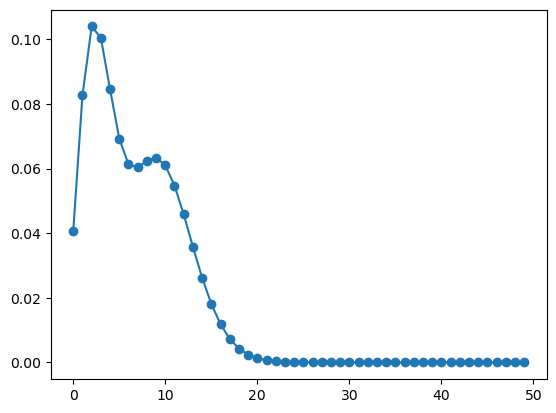

In [4]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

pi = np.array([0.5, 0.5])
mu = np.array([3, 10])
sigma = np.array([1, 1])

pois_dens = generate_poisson(pi, mu, sigma)

plt.plot(range(50), pois_dens, marker= 'o')